In [2]:
import numpy as np
import matplotlib.pyplot as plt

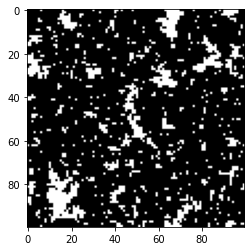

In [3]:
# Parameters
L = 100  # size of lattice
T = 2 / np.log(1 + np.sqrt(2))  # temperature
J = 1.0  # interaction strength
num_steps = 1000  # number of Monte Carlo steps

# Initialize lattice
lattice = np.ones((L, L))

# Function to calculate the energy change for a single spin flip
def deltaE(i, j):
    return 2 * J * lattice[i, j] * (lattice[(i-1)%L, j] + lattice[(i+1)%L, j] +
                                    lattice[i, (j-1)%L] + lattice[i, (j+1)%L])

# Metropolis update rule
for _ in range(num_steps):
    for _ in range(L * L):
        i, j = np.random.randint(0, L, 2)
        dE = deltaE(i, j)
        if dE < 0 or np.random.rand() < np.exp(-dE / T):
            lattice[i, j] *= -1

# Display the final state
plt.imshow(lattice, cmap='binary')
plt.show()

this script generates new configurations by initializing a new lattice for each configuration. This is not necessarily the correct way to generate independent configurations due to autocorrelation between spins. A more accurate way would be to initialize the lattice once, then run the Metropolis algorithm for a certain number of steps to reach equilibrium, then take a snapshot of the configuration, run the algorithm for a few more steps, take another snapshot, and so on. We will do this to generate configurations more independent of one another

In [7]:
# Parameters
L = 10  # size of lattice
T = 2 / np.log(1 + np.sqrt(2))  # temperature
J = 1.0  # interaction strength
num_steps = 1000  # number of Monte Carlo steps
num_configs = 10000  # number of configurations to generate try 10,000
steps_between_configs = 100  # number of steps between snapshots

# Function to calculate the energy change for a single spin flip
def deltaE(i, j):
    return 2 * J * lattice[i, j] * (lattice[(i-1)%L, j] + lattice[(i+1)%L, j] +
                                    lattice[i, (j-1)%L] + lattice[i, (j+1)%L])

# Array to hold the configurations
configs = np.empty((num_configs, L, L))

# Initialize lattice
lattice = np.ones((L, L))

# Run the Metropolis algorithm until equilibrium
for _ in range(num_steps):
    for _ in range(L * L):
        i, j = np.random.randint(0, L, 2)
        dE = deltaE(i, j)
        if dE < 0 or np.random.rand() < np.exp(-dE / T):
            lattice[i, j] *= -1

# Generate the configurations
for config_idx in range(num_configs):
    # Run the Metropolis algorithm for a few steps
    for _ in range(steps_between_configs):
        for _ in range(L * L):
            i, j = np.random.randint(0, L, 2)
            dE = deltaE(i, j)
            if dE < 0 or np.random.rand() < np.exp(-dE / T):
                lattice[i, j] *= -1
    # Store the configuration
    configs[config_idx] = lattice

# Flatten and map spins from -1/+1 to 0/1
rbm_data = ((configs.reshape(num_configs, -1) + 1) / 2).astype(int)


This approach should yield configurations that are more independent from each other. It's important to choose an appropriate value for steps_between_configs to reduce autocorrelation. Too few steps will result in highly correlated configurations, while too many steps will be computationally inefficient. 

# Save the data produced

In [9]:
np.save('rbm_data.npy', rbm_data)

# Generating Configurations at Multiple Temperatures

In [3]:
def generate_data_for_temperature(T, num_configs, L, J, num_steps, steps_between_configs):
    def deltaE(i, j):
        return 2 * J * lattice[i, j] * (lattice[(i-1)%L, j] + lattice[(i+1)%L, j] +
                                        lattice[i, (j-1)%L] + lattice[i, (j+1)%L])

    configs = np.empty((num_configs, L, L))
    lattice = np.ones((L, L))

    # Run the Metropolis algorithm until equilibrium
    for _ in range(num_steps):
        for _ in range(L * L):
            i, j = np.random.randint(0, L, 2)
            dE = deltaE(i, j)
            if dE < 0 or np.random.rand() < np.exp(-dE / T):
                lattice[i, j] *= -1

    # Generate the configurations
    for config_idx in range(num_configs):
        # Run the Metropolis algorithm for a few steps
        for _ in range(steps_between_configs):
            for _ in range(L * L):
                i, j = np.random.randint(0, L, 2)
                dE = deltaE(i, j)
                if dE < 0 or np.random.rand() < np.exp(-dE / T):
                    lattice[i, j] *= -1
        configs[config_idx] = lattice

    return ((configs.reshape(num_configs, -1) + 1) / 2).astype(int)

# Define the parameters
L = 10
J = 1.0
num_steps = 1000
num_configs = 10000
steps_between_configs = 100

# Generate data for 5 different temperatures
temperatures = [1.0, 1.5, 2.0, 2.5, 3.0]
rbm_data = [generate_data_for_temperature(T, num_configs, L, J, num_steps, steps_between_configs) for T in temperatures]


In [5]:
np.save('rbm_data2.npy', rbm_data)

# Generating initial configurations

In [6]:
# Generate one initial configuration for each temperature
initial_configs = [generate_data_for_temperature(T, num_configs=1, L=L, J=J, num_steps=num_steps, steps_between_configs=steps_between_configs) for T in temperatures]

# Unpack the single configuration from each dataset
initial_configs = [configs[0] for configs in initial_configs]


In [7]:
import pickle

with open('initial_configs.pickle', 'wb') as f:
    pickle.dump(initial_configs, f)
